<h1><center>Dementia Disease Prediction </center></h1>

## Reading and understanding the Data

In [1]:
# import libraries for initial state of data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Additional visualization libraries for enhanced analysis
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Set enhanced plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Enhanced visualization libraries loaded successfully!")

Enhanced visualization libraries loaded successfully!


In [2]:
# Read .csv as a dataframe
data = pd.read_csv("dementia_dataset_1.csv")

data.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
data.shape

(2149, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
# drop unnecessary columns
data.drop(["PatientID","DoctorInCharge"], axis=1, inplace=True)

data.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [6]:
# Check for duplicate rows and missing values
print("Duplicate rows: ", sum(data.duplicated()))
print(data.isnull().sum())

Duplicate rows:  0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness       

In [7]:
data.nunique() # Number of unique values can help in determining which features are numerical which ones are categorical features.

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

### Distribution of the Target Variable (*Diagnosis*)

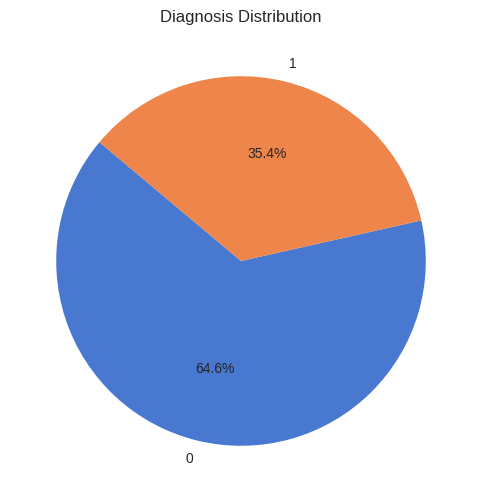

In [8]:
# Define the Response categories and count occurances
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

# Color palette
colors = sns.color_palette("muted")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

### Enhanced Data Distribution Analysis

Let's explore the data with comprehensive visualizations to understand patterns, distributions, and relationships.


Creating comprehensive data analysis visualizations...

1. Feature Distribution Analysis
Analyzing 32 numerical features


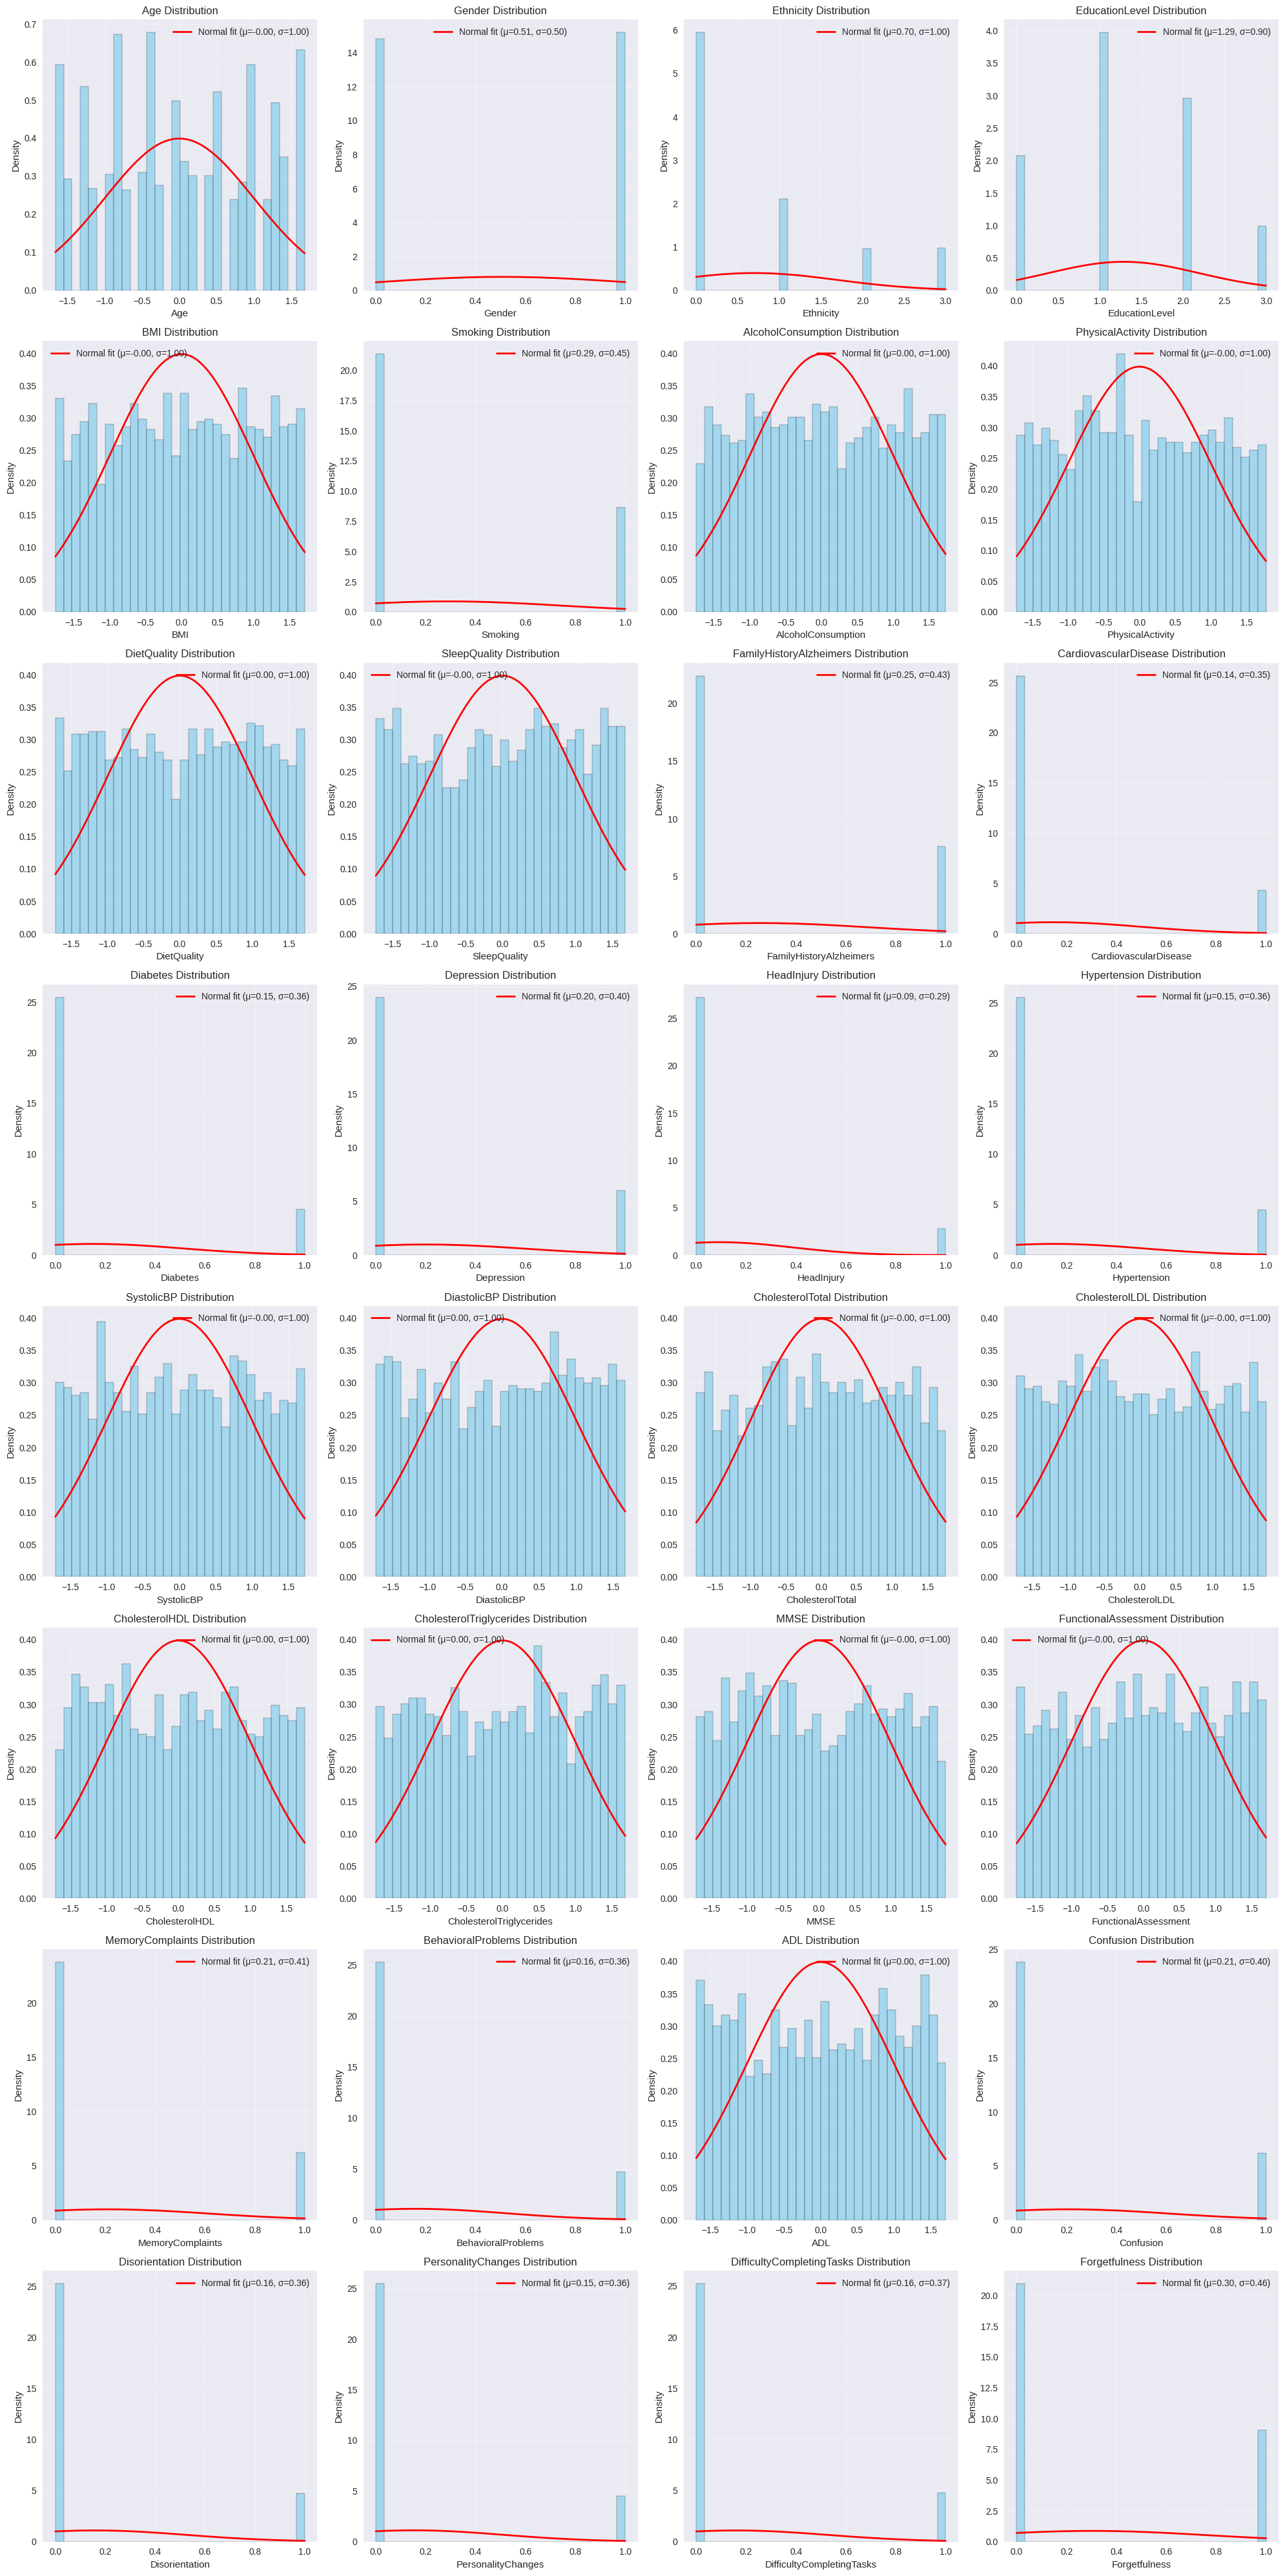

In [26]:
# Enhanced Statistical Analysis and Visualizations
print("Creating comprehensive data analysis visualizations...")

# 1. Detailed Feature Distribution Analysis
print("\n1. Feature Distribution Analysis")

# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
if 'Diagnosis' in numerical_features:
    numerical_features.remove('Diagnosis')

print(f"Analyzing {len(numerical_features)} numerical features")

# Create distribution plots for all numerical features
n_features = len(numerical_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram with density curve
        axes[i].hist(data[feature], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Add normal distribution curve for comparison
        mu, sigma = stats.norm.fit(data[feature])
        x = np.linspace(data[feature].min(), data[feature].max(), 100)
        p = stats.norm.pdf(x, mu, sigma)
        axes[i].plot(x, p, 'r-', linewidth=2, label=f'Normal fit (μ={mu:.2f}, σ={sigma:.2f})')
        
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()



### Explore Correlations

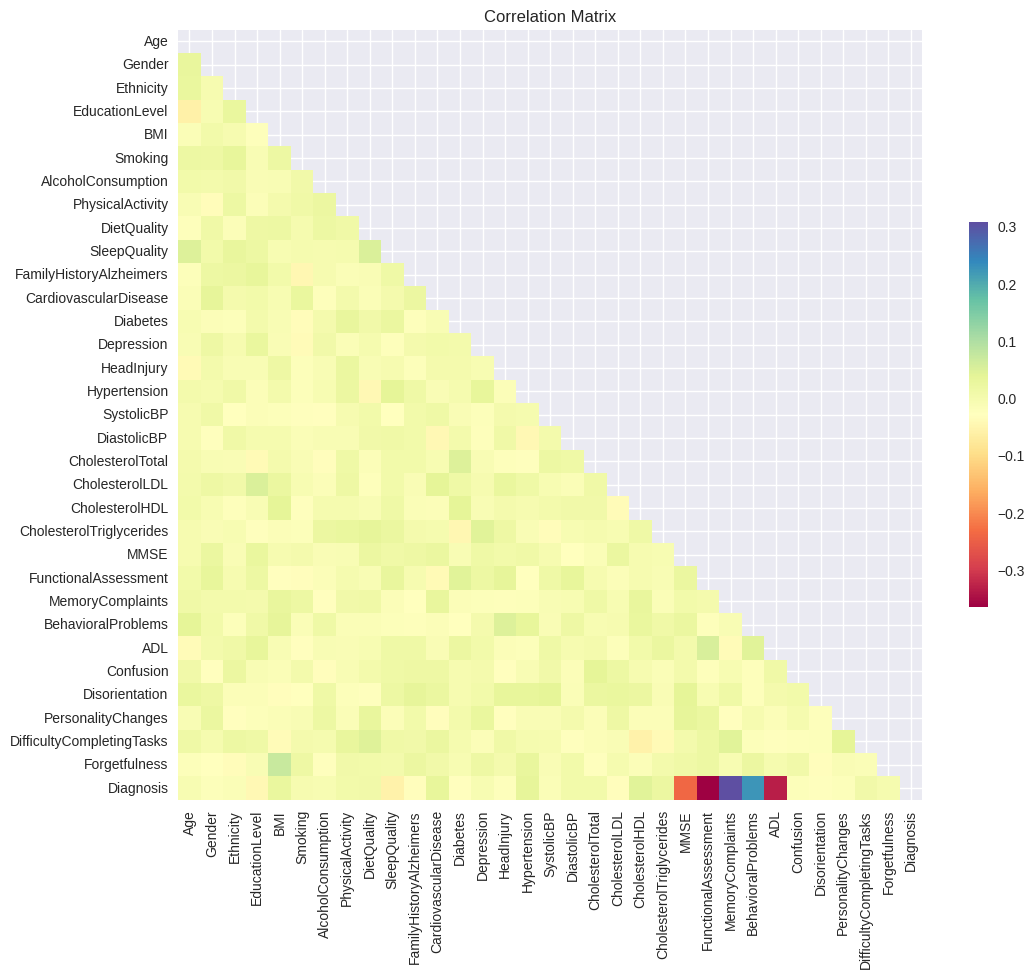

In [12]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="Spectral", cbar_kws={"shrink": .5}, mask=mask)
plt.title("Correlation Matrix")
plt.show()

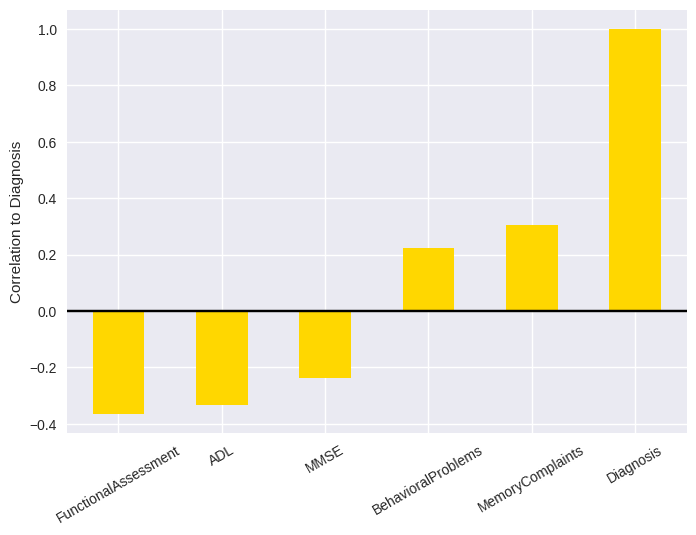

In [13]:
corr_matrix=data.corr()['Diagnosis']
heatcol=data.columns[corr_matrix.abs() > 0.1]
data[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='gold')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

<h1><center>Data Pre-Processing</center></h1>

### Scale Data: Normalize & Standardize Numerical Features

In [16]:
# Identify numerical features: features with more than 5 unique values are considered numerical
num_cols = [
    col for col in data.columns if col != "Diagnosis" and data[col].nunique() > 5
]

# Identify categorical features: features that are not numerical and not 'Diagnosis'
cat_cols = data.columns.difference(num_cols).difference(["Diagnosis"]).to_list()

print("Numerical cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))

Numerical cols: 15
Categorical cols: 17


### Convert Categorical Features to Dummy Variables

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize numerical features
min_max_scaler = MinMaxScaler()
data[num_cols] = min_max_scaler.fit_transform(data[num_cols])

# Standardize numerical features
standard_scaler = StandardScaler()
data[num_cols] = standard_scaler.fit_transform(data[num_cols])

<h1>
    <center> Classification Modeling</center>
</h1>

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier



### Prepare Data for Training
- Feature and Target Separation
- Train-Test Split

In [19]:
# Split dataset
X = data.drop(columns=["Diagnosis"]) 
y = data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Balance the training dataset

In [20]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the two classes
class_0 = train_data[
    train_data["Diagnosis"] == 0
]  # Replace 0 with the actual class label
class_1 = train_data[
    train_data["Diagnosis"] == 1
]  # Replace 1 with the actual class label

# Resample to balance the classes
class_0_resampled = resample(
    class_0, replace=False, n_samples=len(class_1), random_state=42
)
balanced_train_data = pd.concat([class_0_resampled, class_1])

# Split back into X_train and y_train
X_train = balanced_train_data.drop(columns=["Diagnosis"])
y_train = balanced_train_data["Diagnosis"]


Class Distribution in Training Dataset:
Diagnosis
0    608
1    608
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x7ce1541005e0>,
 [Text(0, 0, ' 0'), Text(1, 0, ' 1')])

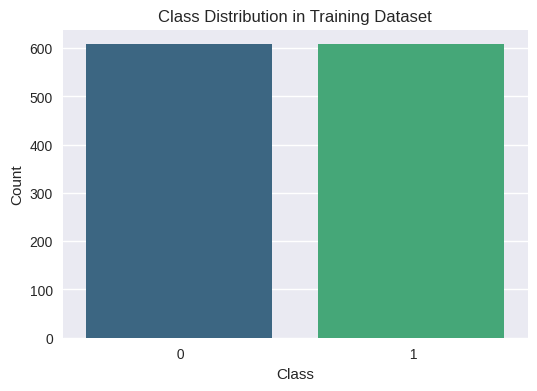

In [21]:
# Visualize the class distribution in the training dataset
print("\nClass Distribution in Training Dataset:")
class_counts = y_train.value_counts()
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=[" 0", " 1"])

### Enhanced Model Performance Visualization

Comprehensive evaluation of model performance with detailed metrics and comparisons.

### Function to evaluate model

In [22]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Score:", scores.mean())
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


### Display Results & Model Evalution

#### XGBoost Classifier

In [23]:

# XGBoost Classifier
print("XGBoost Classifier:")
xgb_model = XGBClassifier(
    n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42
)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


XGBoost Classifier:
Cross-Validation Scores: [0.89754098 0.90123457 0.93004115 0.89300412 0.93004115]
Mean Cross-Validation Score: 0.9103723942521758
Accuracy: 0.913953488372093

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       278
           1       0.84      0.93      0.88       152

    accuracy                           0.91       430
   macro avg       0.90      0.92      0.91       430
weighted avg       0.92      0.91      0.91       430


Confusion Matrix:
 [[252  26]
 [ 11 141]]
Cross-Validation Scores: [0.89754098 0.90123457 0.93004115 0.89300412 0.93004115]
Mean Cross-Validation Score: 0.9103723942521758
Accuracy: 0.913953488372093

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       278
           1       0.84      0.93      0.88       152

    accuracy                           0.91       430
   macro avg       0.90   

#### Random Forest Classifier

In [24]:
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)



Random Forest Classifier:
Cross-Validation Scores: [0.92622951 0.93415638 0.94238683 0.91769547 0.95473251]
Mean Cross-Validation Score: 0.9350401403224717
Accuracy: 0.9488372093023256

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430


Confusion Matrix:
 [[268  10]
 [ 12 140]]
Cross-Validation Scores: [0.92622951 0.93415638 0.94238683 0.91769547 0.95473251]
Mean Cross-Validation Score: 0.9350401403224717
Accuracy: 0.9488372093023256

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.92      0.93       152

    accuracy                           0.95       430
   macro avg     